In [0]:
"""from google.colab import drive
drive.mount('/content/drive')"""
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My\ Drive/Colab Notebooks/


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive/My Drive/Colab Notebooks


In [0]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 18218808457132135704, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 13696624502978536285
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 15695688741462971914
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14648777152
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 9430186010799885403
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [0]:
!cat /proc/meminfo
#the gpu info

MemTotal:       13333556 kB
MemFree:         9109800 kB
MemAvailable:   11816836 kB
Buffers:           74664 kB
Cached:          2771244 kB
SwapCached:            0 kB
Active:          1288852 kB
Inactive:        2534292 kB
Active(anon):     931720 kB
Inactive(anon):     8528 kB
Active(file):     357132 kB
Inactive(file):  2525764 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:              2300 kB
Writeback:             0 kB
AnonPages:        977184 kB
Mapped:           674316 kB
Shmem:              9144 kB
Slab:             175944 kB
SReclaimable:     130060 kB
SUnreclaim:        45884 kB
KernelStack:        4496 kB
PageTables:         9292 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6666776 kB
Committed_AS:    3476068 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
Percpu:              920 kB
AnonHugePages:   

In [0]:
#nor_es
import os
import io
import numpy as np
from keras.preprocessing import image
import pandas as pd
from PIL import Image, ImageChops, ImageEnhance
import os
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.models import Model, Sequential 
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau, EarlyStopping




In [0]:
def jpeg_compression(img: Image.Image, quality: int=90) -> Image.Image:
    if img.mode != 'RGB':
        img = img.convert('RGB')
    buffer = io.BytesIO()
    img.save(buffer, format='JPEG', quality=quality)
    im_data = buffer.getvalue()
    img = Image.open(io.BytesIO(im_data))
    buffer.close()
    return img


In [0]:
def convert_to_ela(img):
    im = img.convert('RGB')
    resaved_im = jpeg_compression(im)
    
    ela_im = ImageChops.difference(im, resaved_im)
    
    extrema = ela_im.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    
    ela_im = ImageEnhance.Brightness(ela_im).enhance(scale)
    
    return ela_im

In [0]:
!pwd

/gdrive/My Drive/Colab Notebooks/Experiments/exp_2


In [0]:
cd Experiments/exp_2/

[Errno 2] No such file or directory: 'Experiments/exp_2/'
/gdrive/My Drive/Colab Notebooks/Experiments/exp_2


In [0]:
!ls

 casia_ela	    exp_2.ipynb   test7.ipynb  'Untitled document.gdoc'
 demo_exp_2.ipynb   sample_data   test8.ipynb


In [0]:
data_path = "casia_ela/"

In [0]:
#Defining Parameters
batch_size = 100
nb_epochs = 30
img_width = 128
img_height = 128


In [0]:
model = Sequential()

# input dimensions 

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'valid',activation ='relu', input_shape=(img_height, img_width, 3)))
print("Input: ", model.input_shape)
print("Output: ", model.output_shape)
 

model.add(MaxPooling2D(pool_size = (2, 2)))
print("Input: ", model.input_shape)
print("Output: ", model.output_shape)



model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'valid', activation ='relu'))
print("Input: ", model.input_shape)
print("Output: ", model.output_shape)

model.add(MaxPooling2D(pool_size=(2,2)))
print("Input: ", model.input_shape)
print("Output: ", model.output_shape)

model.add(Dropout(0.25))
print("Input: ", model.input_shape)
print("Output: ", model.output_shape, "  <----------")



#def tf_spatial_pyramid_pooling(tf_input_feature_maps, tf_spatial_pyramid, dtype=tf.float32):
#    return tf.py_func(np_spatial_pyramid_pooling, [tf_input_feature_maps, tf_spatial_pyramid], dtype)
#average pooling !!

#from keras.layers import Input
#from keras.models import Model
#from keras_pyramid_pooling_module import PyramidPoolingModule

#input_ = Input((224, 224, 3))
#x = PyramidPoolingModule()(input_)
#model = Model(inputs=input_, outputs=x)








#model.add(GlobalAveragePooling2D())
#print("Input: ", model.input_shape)
#print("Output: ", model.output_shape, " <-----------")


model.add(Flatten())
print("Input: ", model.input_shape)
print("Output: ", model.output_shape, "final2")

model.add(Dense(256, activation = "relu"))
print("Input: ", model.input_shape)
print("Output: ", model.output_shape)
    

model.add(Dropout(0.5))
model.add(Dense(2, activation = "softmax"))
print("Input: ", model.input_shape)
print("Output: ", model.output_shape, "final2")



Input:  (None, 128, 128, 3)
Output:  (None, 124, 124, 32)
Input:  (None, 128, 128, 3)
Output:  (None, 62, 62, 32)
Input:  (None, 128, 128, 3)
Output:  (None, 58, 58, 32)
Input:  (None, 128, 128, 3)
Output:  (None, 29, 29, 32)
Input:  (None, 128, 128, 3)
Output:  (None, 29, 29, 32)   <----------
Input:  (None, 128, 128, 3)
Output:  (None, 26912) final2
Input:  (None, 128, 128, 3)
Output:  (None, 256)
Input:  (None, 128, 128, 3)
Output:  (None, 2) final2


In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 124, 124, 32)      2432      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 58, 58, 32)        25632     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 29, 29, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 29, 29, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 26912)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)              

In [0]:
optimizer = RMSprop(lr=0.0005, rho=0.9, epsilon=1e-08, decay=0.0)


In [0]:
model.compile(optimizer = optimizer , loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [0]:
early_stopping = EarlyStopping(monitor='val_accuracy',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='auto')

In [0]:
#weights = "saved_weights/test8.hdf5"
#model.load_weights(weights)


In [0]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

In [0]:
train_data = train_datagen.flow_from_directory(
    data_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

Found 11469 images belonging to 2 classes.


In [0]:
validation_data = train_datagen.flow_from_directory(
    data_path, # same directory as training data
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

Found 2866 images belonging to 2 classes.


In [0]:
history = model.fit_generator(
            train_data,
            steps_per_epoch = train_data.samples // batch_size,
            validation_data = validation_data, 
            validation_steps = validation_data.samples // batch_size,
            epochs = nb_epochs,
            callbacks = [early_stopping])

Epoch 1/30


/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 18 could not be retrieved. It could be because a worker has died.
  UserWarning)


  1/114 [..............................] - ETA: 1:56:38 - loss: 0.6993 - accuracy: 0.4600

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 105 could not be retrieved. It could be because a worker has died.
  UserWarning)


  2/114 [..............................] - ETA: 1:43:22 - loss: 1.4736 - accuracy: 0.5400

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 55 could not be retrieved. It could be because a worker has died.
  UserWarning)


  3/114 [..............................] - ETA: 1:41:07 - loss: 1.2166 - accuracy: 0.5433

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 70 could not be retrieved. It could be because a worker has died.
  UserWarning)


  4/114 [>.............................] - ETA: 1:40:40 - loss: 1.0826 - accuracy: 0.5400

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 106 could not be retrieved. It could be because a worker has died.
  UserWarning)


  5/114 [>.............................] - ETA: 1:39:43 - loss: 0.9953 - accuracy: 0.5460

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 64 could not be retrieved. It could be because a worker has died.
  UserWarning)


  6/114 [>.............................] - ETA: 1:40:15 - loss: 0.9503 - accuracy: 0.5417

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 81 could not be retrieved. It could be because a worker has died.
  UserWarning)


  7/114 [>.............................] - ETA: 1:39:13 - loss: 0.9142 - accuracy: 0.5371

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 14 could not be retrieved. It could be because a worker has died.
  UserWarning)


  8/114 [=>............................] - ETA: 1:38:11 - loss: 0.8821 - accuracy: 0.5350

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 74 could not be retrieved. It could be because a worker has died.
  UserWarning)


  9/114 [=>............................] - ETA: 1:37:56 - loss: 0.8528 - accuracy: 0.5478

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 98 could not be retrieved. It could be because a worker has died.
  UserWarning)


 10/114 [=>............................] - ETA: 1:36:16 - loss: 0.8271 - accuracy: 0.5500

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 38 could not be retrieved. It could be because a worker has died.
  UserWarning)


 11/114 [=>............................] - ETA: 1:35:02 - loss: 0.8031 - accuracy: 0.5545

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 94 could not be retrieved. It could be because a worker has died.
  UserWarning)


 12/114 [==>...........................] - ETA: 1:35:19 - loss: 0.7806 - accuracy: 0.5592

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 66 could not be retrieved. It could be because a worker has died.
  UserWarning)


 13/114 [==>...........................] - ETA: 1:33:54 - loss: 0.7597 - accuracy: 0.5731

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 20 could not be retrieved. It could be because a worker has died.
  UserWarning)


 14/114 [==>...........................] - ETA: 1:32:32 - loss: 0.7510 - accuracy: 0.5721

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 45 could not be retrieved. It could be because a worker has died.
  UserWarning)


 15/114 [==>...........................] - ETA: 1:31:56 - loss: 0.7425 - accuracy: 0.5747

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 13 could not be retrieved. It could be because a worker has died.
  UserWarning)


 16/114 [===>..........................] - ETA: 1:30:34 - loss: 0.7299 - accuracy: 0.5763

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 110 could not be retrieved. It could be because a worker has died.
  UserWarning)


 17/114 [===>..........................] - ETA: 1:29:20 - loss: 0.7180 - accuracy: 0.5853

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 102 could not be retrieved. It could be because a worker has died.
  UserWarning)


 18/114 [===>..........................] - ETA: 1:28:06 - loss: 0.7123 - accuracy: 0.5839

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 7 could not be retrieved. It could be because a worker has died.
  UserWarning)


 19/114 [====>.........................] - ETA: 1:27:30 - loss: 0.7038 - accuracy: 0.5953

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 95 could not be retrieved. It could be because a worker has died.
  UserWarning)


 20/114 [====>.........................] - ETA: 1:26:25 - loss: 0.6960 - accuracy: 0.6000

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 85 could not be retrieved. It could be because a worker has died.
  UserWarning)


 21/114 [====>.........................] - ETA: 1:25:14 - loss: 0.6908 - accuracy: 0.6062

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 90 could not be retrieved. It could be because a worker has died.
  UserWarning)


 22/114 [====>.........................] - ETA: 1:24:00 - loss: 0.6825 - accuracy: 0.6091

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 22 could not be retrieved. It could be because a worker has died.
  UserWarning)


 23/114 [=====>........................] - ETA: 1:22:48 - loss: 0.6747 - accuracy: 0.6191

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 61 could not be retrieved. It could be because a worker has died.
  UserWarning)


 24/114 [=====>........................] - ETA: 1:21:45 - loss: 0.6685 - accuracy: 0.6271

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 39 could not be retrieved. It could be because a worker has died.
  UserWarning)


 25/114 [=====>........................] - ETA: 1:20:37 - loss: 0.6650 - accuracy: 0.6260

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 51 could not be retrieved. It could be because a worker has died.
  UserWarning)


 26/114 [=====>........................] - ETA: 1:19:33 - loss: 0.6658 - accuracy: 0.6235

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 24 could not be retrieved. It could be because a worker has died.
  UserWarning)


 27/114 [======>.......................] - ETA: 1:18:48 - loss: 0.6596 - accuracy: 0.6259

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 84 could not be retrieved. It could be because a worker has died.
  UserWarning)


 28/114 [======>.......................] - ETA: 1:17:46 - loss: 0.6532 - accuracy: 0.6314

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 47 could not be retrieved. It could be because a worker has died.
  UserWarning)


 29/114 [======>.......................] - ETA: 1:16:49 - loss: 0.6467 - accuracy: 0.6355

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 48 could not be retrieved. It could be because a worker has died.
  UserWarning)


 30/114 [======>.......................] - ETA: 1:16:01 - loss: 0.6420 - accuracy: 0.6393

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 75 could not be retrieved. It could be because a worker has died.
  UserWarning)


 31/114 [=======>......................] - ETA: 1:15:00 - loss: 0.6355 - accuracy: 0.6426

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 59 could not be retrieved. It could be because a worker has died.
  UserWarning)


 32/114 [=======>......................] - ETA: 1:13:56 - loss: 0.6305 - accuracy: 0.6484

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 62 could not be retrieved. It could be because a worker has died.
  UserWarning)


 33/114 [=======>......................] - ETA: 1:12:54 - loss: 0.6270 - accuracy: 0.6494

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 37 could not be retrieved. It could be because a worker has died.
  UserWarning)


 34/114 [=======>......................] - ETA: 1:11:54 - loss: 0.6289 - accuracy: 0.6459

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 57 could not be retrieved. It could be because a worker has died.
  UserWarning)


 35/114 [========>.....................] - ETA: 1:11:02 - loss: 0.6240 - accuracy: 0.6506

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 11 could not be retrieved. It could be because a worker has died.
  UserWarning)


 36/114 [========>.....................] - ETA: 1:10:08 - loss: 0.6221 - accuracy: 0.6519

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 80 could not be retrieved. It could be because a worker has died.
  UserWarning)


 37/114 [========>.....................] - ETA: 1:09:06 - loss: 0.6194 - accuracy: 0.6541

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 46 could not be retrieved. It could be because a worker has died.
  UserWarning)


 38/114 [=========>....................] - ETA: 1:08:13 - loss: 0.6138 - accuracy: 0.6579

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 32 could not be retrieved. It could be because a worker has died.
  UserWarning)


 39/114 [=========>....................] - ETA: 1:07:15 - loss: 0.6105 - accuracy: 0.6605

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 56 could not be retrieved. It could be because a worker has died.
  UserWarning)


 40/114 [=========>....................] - ETA: 1:06:15 - loss: 0.6080 - accuracy: 0.6612

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 89 could not be retrieved. It could be because a worker has died.
  UserWarning)


 41/114 [=========>....................] - ETA: 1:05:14 - loss: 0.6056 - accuracy: 0.6632

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 41 could not be retrieved. It could be because a worker has died.
  UserWarning)


 42/114 [==========>...................] - ETA: 1:04:15 - loss: 0.6025 - accuracy: 0.6648

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 92 could not be retrieved. It could be because a worker has died.
  UserWarning)


 43/114 [==========>...................] - ETA: 1:03:17 - loss: 0.5985 - accuracy: 0.6684

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 79 could not be retrieved. It could be because a worker has died.
  UserWarning)


 44/114 [==========>...................] - ETA: 1:02:20 - loss: 0.6013 - accuracy: 0.6668

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 1 could not be retrieved. It could be because a worker has died.
  UserWarning)


 45/114 [==========>...................] - ETA: 1:01:34 - loss: 0.6018 - accuracy: 0.6651

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 23 could not be retrieved. It could be because a worker has died.
  UserWarning)


 46/114 [===========>..................] - ETA: 1:00:39 - loss: 0.5983 - accuracy: 0.6700

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 4 could not be retrieved. It could be because a worker has died.
  UserWarning)


 47/114 [===========>..................] - ETA: 59:42 - loss: 0.5957 - accuracy: 0.6719  

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 103 could not be retrieved. It could be because a worker has died.
  UserWarning)


 48/114 [===========>..................] - ETA: 58:45 - loss: 0.5938 - accuracy: 0.6742

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 30 could not be retrieved. It could be because a worker has died.
  UserWarning)


 49/114 [===========>..................] - ETA: 57:48 - loss: 0.5892 - accuracy: 0.6776

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 19 could not be retrieved. It could be because a worker has died.
  UserWarning)


 50/114 [============>.................] - ETA: 56:53 - loss: 0.5855 - accuracy: 0.6804

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 17 could not be retrieved. It could be because a worker has died.
  UserWarning)


 51/114 [============>.................] - ETA: 56:00 - loss: 0.5821 - accuracy: 0.6824

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 112 could not be retrieved. It could be because a worker has died.
  UserWarning)


 52/114 [============>.................] - ETA: 55:06 - loss: 0.5783 - accuracy: 0.6860

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 68 could not be retrieved. It could be because a worker has died.
  UserWarning)


 53/114 [============>.................] - ETA: 54:10 - loss: 0.5760 - accuracy: 0.6875

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 71 could not be retrieved. It could be because a worker has died.
  UserWarning)


 54/114 [=============>................] - ETA: 53:18 - loss: 0.5788 - accuracy: 0.6863

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 44 could not be retrieved. It could be because a worker has died.
  UserWarning)


 55/114 [=============>................] - ETA: 52:23 - loss: 0.5819 - accuracy: 0.6840

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 101 could not be retrieved. It could be because a worker has died.
  UserWarning)


 56/114 [=============>................] - ETA: 51:33 - loss: 0.5799 - accuracy: 0.6855

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 63 could not be retrieved. It could be because a worker has died.
  UserWarning)


 57/114 [==============>...............] - ETA: 50:37 - loss: 0.5764 - accuracy: 0.6888

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 96 could not be retrieved. It could be because a worker has died.
  UserWarning)


 58/114 [==============>...............] - ETA: 49:42 - loss: 0.5740 - accuracy: 0.6903

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 26 could not be retrieved. It could be because a worker has died.
  UserWarning)


 59/114 [==============>...............] - ETA: 48:48 - loss: 0.5714 - accuracy: 0.6932

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 50 could not be retrieved. It could be because a worker has died.
  UserWarning)


 60/114 [==============>...............] - ETA: 47:56 - loss: 0.5699 - accuracy: 0.6947

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 25 could not be retrieved. It could be because a worker has died.
  UserWarning)


 61/114 [===============>..............] - ETA: 47:08 - loss: 0.5672 - accuracy: 0.6972

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 12 could not be retrieved. It could be because a worker has died.
  UserWarning)


 62/114 [===============>..............] - ETA: 46:13 - loss: 0.5648 - accuracy: 0.6989

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 35 could not be retrieved. It could be because a worker has died.
  UserWarning)


 63/114 [===============>..............] - ETA: 45:18 - loss: 0.5626 - accuracy: 0.7006

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 86 could not be retrieved. It could be because a worker has died.
  UserWarning)


 64/114 [===============>..............] - ETA: 44:23 - loss: 0.5604 - accuracy: 0.7033

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 3 could not be retrieved. It could be because a worker has died.
  UserWarning)


 65/114 [================>.............] - ETA: 43:28 - loss: 0.5574 - accuracy: 0.7054

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 99 could not be retrieved. It could be because a worker has died.
  UserWarning)


 66/114 [================>.............] - ETA: 42:34 - loss: 0.5552 - accuracy: 0.7077

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 113 could not be retrieved. It could be because a worker has died.
  UserWarning)


 67/114 [================>.............] - ETA: 41:39 - loss: 0.5515 - accuracy: 0.7107

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 0 could not be retrieved. It could be because a worker has died.
  UserWarning)


 68/114 [================>.............] - ETA: 40:44 - loss: 0.5516 - accuracy: 0.7113

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 91 could not be retrieved. It could be because a worker has died.
  UserWarning)


 69/114 [=================>............] - ETA: 39:50 - loss: 0.5531 - accuracy: 0.7099

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 2 could not be retrieved. It could be because a worker has died.
  UserWarning)


 70/114 [=================>............] - ETA: 38:55 - loss: 0.5497 - accuracy: 0.7126

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 73 could not be retrieved. It could be because a worker has died.
  UserWarning)


 71/114 [=================>............] - ETA: 38:01 - loss: 0.5472 - accuracy: 0.7144

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 114 could not be retrieved. It could be because a worker has died.
  UserWarning)


 72/114 [=================>............] - ETA: 36:58 - loss: 0.5449 - accuracy: 0.7154

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 33 could not be retrieved. It could be because a worker has died.
  UserWarning)


 73/114 [==================>...........] - ETA: 36:04 - loss: 0.5446 - accuracy: 0.7158

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 43 could not be retrieved. It could be because a worker has died.
  UserWarning)


 74/114 [==================>...........] - ETA: 35:10 - loss: 0.5452 - accuracy: 0.7148

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 40 could not be retrieved. It could be because a worker has died.
  UserWarning)


 75/114 [==================>...........] - ETA: 34:16 - loss: 0.5433 - accuracy: 0.7166

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 87 could not be retrieved. It could be because a worker has died.
  UserWarning)


 76/114 [===================>..........] - ETA: 33:22 - loss: 0.5416 - accuracy: 0.7179

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 83 could not be retrieved. It could be because a worker has died.
  UserWarning)


 77/114 [===================>..........] - ETA: 32:29 - loss: 0.5397 - accuracy: 0.7194

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 28 could not be retrieved. It could be because a worker has died.
  UserWarning)


 78/114 [===================>..........] - ETA: 31:36 - loss: 0.5385 - accuracy: 0.7208

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 27 could not be retrieved. It could be because a worker has died.
  UserWarning)


 79/114 [===================>..........] - ETA: 30:43 - loss: 0.5364 - accuracy: 0.7218

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 107 could not be retrieved. It could be because a worker has died.
  UserWarning)


 80/114 [====================>.........] - ETA: 29:50 - loss: 0.5346 - accuracy: 0.7231

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 69 could not be retrieved. It could be because a worker has died.
  UserWarning)


 81/114 [====================>.........] - ETA: 28:59 - loss: 0.5332 - accuracy: 0.7243

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 78 could not be retrieved. It could be because a worker has died.
  UserWarning)


 82/114 [====================>.........] - ETA: 28:06 - loss: 0.5310 - accuracy: 0.7255

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 31 could not be retrieved. It could be because a worker has died.
  UserWarning)


 83/114 [====================>.........] - ETA: 27:15 - loss: 0.5281 - accuracy: 0.7274

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 67 could not be retrieved. It could be because a worker has died.
  UserWarning)


 84/114 [=====================>........] - ETA: 26:22 - loss: 0.5269 - accuracy: 0.7282

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 108 could not be retrieved. It could be because a worker has died.
  UserWarning)


 85/114 [=====================>........] - ETA: 25:30 - loss: 0.5263 - accuracy: 0.7292

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 72 could not be retrieved. It could be because a worker has died.
  UserWarning)


 86/114 [=====================>........] - ETA: 24:37 - loss: 0.5259 - accuracy: 0.7302

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 8 could not be retrieved. It could be because a worker has died.
  UserWarning)


 87/114 [=====================>........] - ETA: 23:45 - loss: 0.5253 - accuracy: 0.7309

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 15 could not be retrieved. It could be because a worker has died.
  UserWarning)


 88/114 [======================>.......] - ETA: 22:53 - loss: 0.5245 - accuracy: 0.7322

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 76 could not be retrieved. It could be because a worker has died.
  UserWarning)


 89/114 [======================>.......] - ETA: 22:00 - loss: 0.5238 - accuracy: 0.7328

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 58 could not be retrieved. It could be because a worker has died.
  UserWarning)


 90/114 [======================>.......] - ETA: 21:07 - loss: 0.5221 - accuracy: 0.7341

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 100 could not be retrieved. It could be because a worker has died.
  UserWarning)


 91/114 [======================>.......] - ETA: 20:15 - loss: 0.5201 - accuracy: 0.7350

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 42 could not be retrieved. It could be because a worker has died.
  UserWarning)


 92/114 [=======================>......] - ETA: 19:22 - loss: 0.5189 - accuracy: 0.7357

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 21 could not be retrieved. It could be because a worker has died.
  UserWarning)


 93/114 [=======================>......] - ETA: 18:28 - loss: 0.5187 - accuracy: 0.7359

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 29 could not be retrieved. It could be because a worker has died.
  UserWarning)


 94/114 [=======================>......] - ETA: 17:35 - loss: 0.5237 - accuracy: 0.7343

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 49 could not be retrieved. It could be because a worker has died.
  UserWarning)


 95/114 [========================>.....] - ETA: 16:42 - loss: 0.5241 - accuracy: 0.7345

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 10 could not be retrieved. It could be because a worker has died.
  UserWarning)


 96/114 [========================>.....] - ETA: 15:49 - loss: 0.5225 - accuracy: 0.7353

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 77 could not be retrieved. It could be because a worker has died.
  UserWarning)


 97/114 [========================>.....] - ETA: 14:56 - loss: 0.5211 - accuracy: 0.7369

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 82 could not be retrieved. It could be because a worker has died.
  UserWarning)


 98/114 [========================>.....] - ETA: 14:04 - loss: 0.5202 - accuracy: 0.7376

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 6 could not be retrieved. It could be because a worker has died.
  UserWarning)


 99/114 [=========================>....] - ETA: 13:10 - loss: 0.5192 - accuracy: 0.7386

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 34 could not be retrieved. It could be because a worker has died.
  UserWarning)


100/114 [=========================>....] - ETA: 12:17 - loss: 0.5181 - accuracy: 0.7394

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 109 could not be retrieved. It could be because a worker has died.
  UserWarning)


101/114 [=========================>....] - ETA: 11:24 - loss: 0.5171 - accuracy: 0.7400

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 88 could not be retrieved. It could be because a worker has died.
  UserWarning)


102/114 [=========================>....] - ETA: 10:31 - loss: 0.5153 - accuracy: 0.7413

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 53 could not be retrieved. It could be because a worker has died.
  UserWarning)


103/114 [==========================>...] - ETA: 9:38 - loss: 0.5134 - accuracy: 0.7425 

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 52 could not be retrieved. It could be because a worker has died.
  UserWarning)


104/114 [==========================>...] - ETA: 8:46 - loss: 0.5136 - accuracy: 0.7432

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 65 could not be retrieved. It could be because a worker has died.
  UserWarning)


105/114 [==========================>...] - ETA: 7:53 - loss: 0.5137 - accuracy: 0.7432

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 60 could not be retrieved. It could be because a worker has died.
  UserWarning)


106/114 [==========================>...] - ETA: 7:00 - loss: 0.5127 - accuracy: 0.7438

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 111 could not be retrieved. It could be because a worker has died.
  UserWarning)


107/114 [===========================>..] - ETA: 6:08 - loss: 0.5115 - accuracy: 0.7451

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 5 could not be retrieved. It could be because a worker has died.
  UserWarning)


108/114 [===========================>..] - ETA: 5:15 - loss: 0.5102 - accuracy: 0.7459

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 93 could not be retrieved. It could be because a worker has died.
  UserWarning)


109/114 [===========================>..] - ETA: 4:22 - loss: 0.5087 - accuracy: 0.7471

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 97 could not be retrieved. It could be because a worker has died.
  UserWarning)


110/114 [===========================>..] - ETA: 3:30 - loss: 0.5074 - accuracy: 0.7479

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 104 could not be retrieved. It could be because a worker has died.
  UserWarning)


111/114 [============================>.] - ETA: 2:37 - loss: 0.5060 - accuracy: 0.7486

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 16 could not be retrieved. It could be because a worker has died.
  UserWarning)


112/114 [============================>.] - ETA: 1:45 - loss: 0.5049 - accuracy: 0.7491

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 36 could not be retrieved. It could be because a worker has died.
  UserWarning)


113/114 [============================>.] - ETA: 52s - loss: 0.5041 - accuracy: 0.7495 

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 9 could not be retrieved. It could be because a worker has died.
  UserWarning)


114/114 [==============================] - 6831s 60s/step - loss: 0.5027 - accuracy: 0.7505 - val_loss: 0.7887 - val_accuracy: 0.6186
Epoch 2/30
114/114 [==============================] - 97s 855ms/step - loss: 0.3625 - accuracy: 0.8446 - val_loss: 0.8572 - val_accuracy: 0.6573
Epoch 3/30
114/114 [==============================] - 96s 845ms/step - loss: 0.3186 - accuracy: 0.8634 - val_loss: 0.7378 - val_accuracy: 0.6518
Epoch 4/30
114/114 [==============================] - 96s 846ms/step - loss: 0.2918 - accuracy: 0.8765 - val_loss: 0.8257 - val_accuracy: 0.6341


In [0]:
print("done")

done


In [0]:
w_test8 = "saved_weights/test8.hdf5"
model.save_weights(w_test8, overwrite = True)

In [0]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


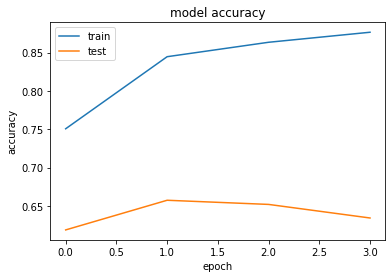

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



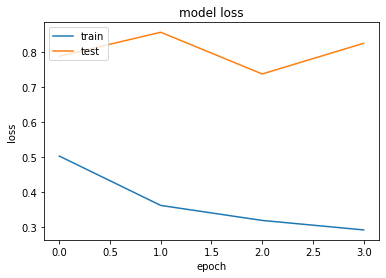

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
#Confusion Matrix and Classification Report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
Y_pred = model.predict_generator(validation_data, validation_data.samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_data.classes, y_pred))


print('Classification Report')
target_names = ['Aut', 'Tamp']
print(classification_report(validation_data.classes, y_pred, target_names=target_names))

Confusion Matrix
[[955 703]
 [695 513]]
Classification Report
              precision    recall  f1-score   support

         Aut       0.58      0.58      0.58      1658
        Tamp       0.42      0.42      0.42      1208

    accuracy                           0.51      2866
   macro avg       0.50      0.50      0.50      2866
weighted avg       0.51      0.51      0.51      2866



In [0]:
x, y = validation_data.class_indices
print(x, y)

aut tamp


In [0]:
#!cp -r path/to/google_drive_data_dir/ path/to/colab_data_dir

In [0]:
#path of any test image
predict_path = "predict_images/i1_cm1.jpg"



In [0]:
from IPython.display import Image as imgloader
display(imgloader(filename = predict_path, width = img_width, height=img_height))


In [0]:
test_img = image.load_img(predict_path, target_size = (img_width, img_height))


test_img = convert_to_ela(test_img)



temp = test_img
test_image = image.img_to_array(test_img)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
temp


In [0]:
train_data.class_indices

In [0]:
result

In [0]:
tamp = result[0][1]
if(tamp==1):
    print("Fake image, some tampering detected !")
else:
    print("The image looks authentic !")